# Additional Deep experiments (mujoco)

In [1]:
import sys
sys.path = ['..'] + sys.path
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import plot_mean_ci, plot_all
from baselines.common.sacred_utils import load_runs, filter_runs

In [27]:
runs = load_runs('../sacred_deep/')
print("Loaded runs:", len(runs.keys()))
#old_runs = load_runs('../sacred_pdisnn')
#print("Loaded runs:", len(old_runs.keys()))

Loaded runs: 20


In [3]:
base_query = {
    'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 1.0,
    'config.clipping': False,
    'config.natural': False,
    'config.policy': 'nn',
    'config.iw_norm': 'none'
}

# Half-cheetah

In [5]:
query = {
        'config.env': 'rllab.half-cheetah',
        'config.iw_method': 'is',
        'config.delta': 0.99,
        'config.bound': 'max-d2',
        'config.num_episodes': 100
    }
filtered_runs = filter_runs({**base_query, **query}, runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

ValueError: min() arg is an empty sequence

## IDP

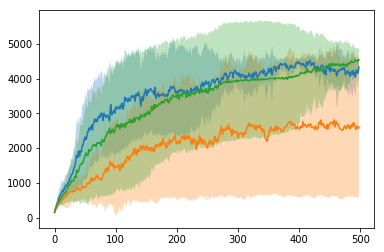

In [36]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'pdis',
        'config.delta': 0.99,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
    }
filtered_runs = filter_runs({**base_query, **query}, runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)

query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.99,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.njobs': -1
    }
filtered_runs = filter_runs({**base_query, **query}, runs)
plot_mean_ci(filtered_runs, 'EpRewMean', axis)

synth_runs = {}
for seed in [10, 109, 904, 570, 160]:
    df = pd.read_csv('../logs/idp_is_reference_seed' + str(seed) + '.csv')
    synth_runs[str(seed)] = {'metrics': {'EpRewMean': {'values': df['EpRewMean'].values}}}
plot_mean_ci(synth_runs, 'EpRewMean', axis)
    
plt.show();

## Inverted Double Pendulum - Linear Policy - Zeros Init

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 109, 904, 10, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.2
Experiments: 5
Seeds: 904, 160, 10, 109, 570
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 20
Seeds: 570, 109, 10, 904, 545, 662, 947, 950, 247, 100, 153, 689, 307, 236, 42, 315, 746, 160, 963, 178
----------------------------------------
Method: pdis  - Delta: 0.4
Experiments: 5
Seeds: 904, 109, 160, 10, 570
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 570, 904, 10, 160, 109


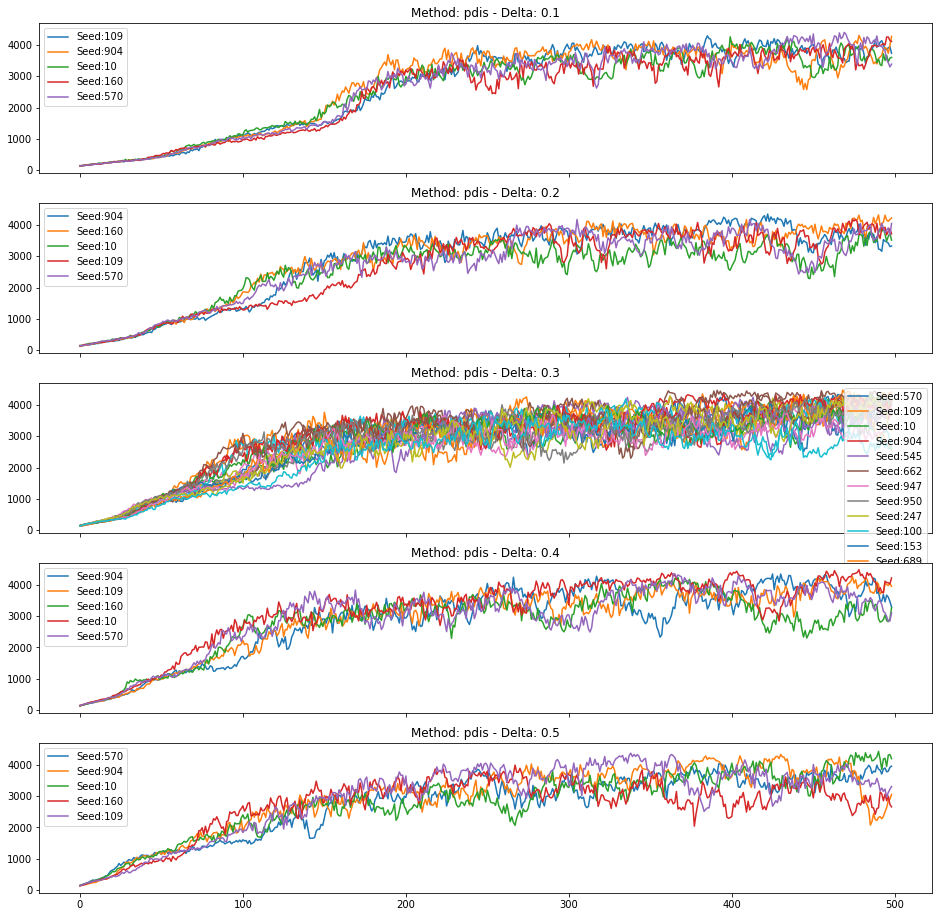

In [8]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.2),
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.4),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

### Optimized runs

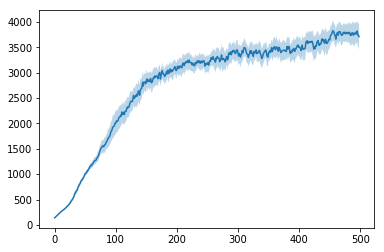

In [9]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'pdis',
        'config.delta': 0.3,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

## Inverted pendulum - zeros

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 109, 10, 160, 904, 570
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 904, 10, 160, 109, 570
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 10, 570, 109, 160, 904
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 10, 904, 160, 570, 109
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 25
Seeds: 10, 570, 160, 904, 109, 904, 570, 662, 963, 947, 545, 307, 100, 153, 950, 236, 42, 247, 746, 178, 689, 315, 160, 10, 109


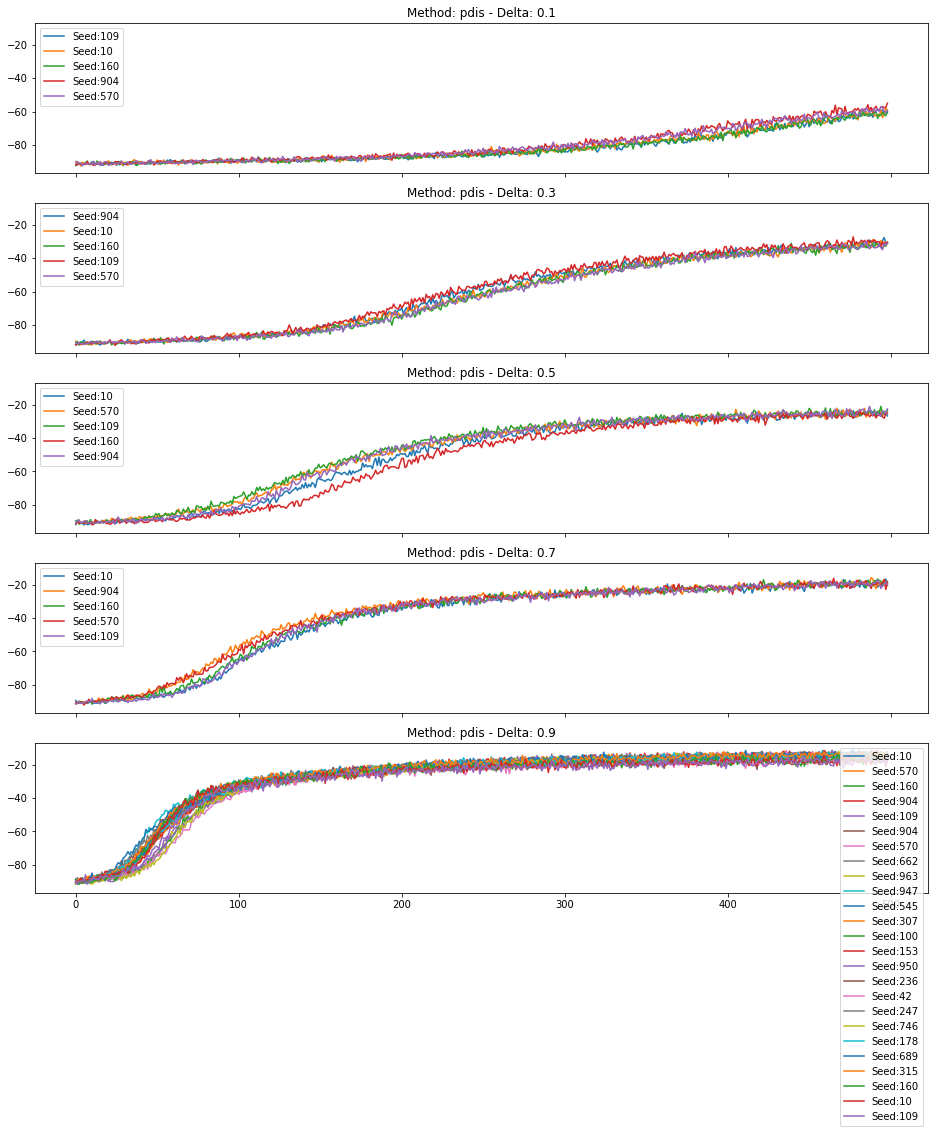

In [10]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'ReturnMeanIW', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

### Optimized runs

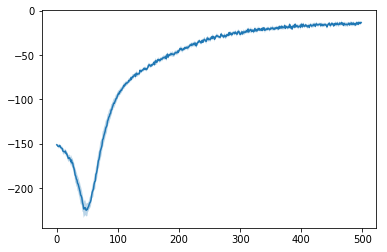

In [11]:
query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': 'pdis',
        'config.delta': 0.9,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

## Acrobot

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 904, 570, 160, 10, 109
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 10, 160, 109, 904, 570
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 20
Seeds: 236, 963, 662, 42, 160, 178, 247, 947, 100, 570, 109, 904, 10, 746, 545, 153, 950, 689, 307, 315
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 570, 10, 904, 109, 160
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 160, 570, 904, 10, 109


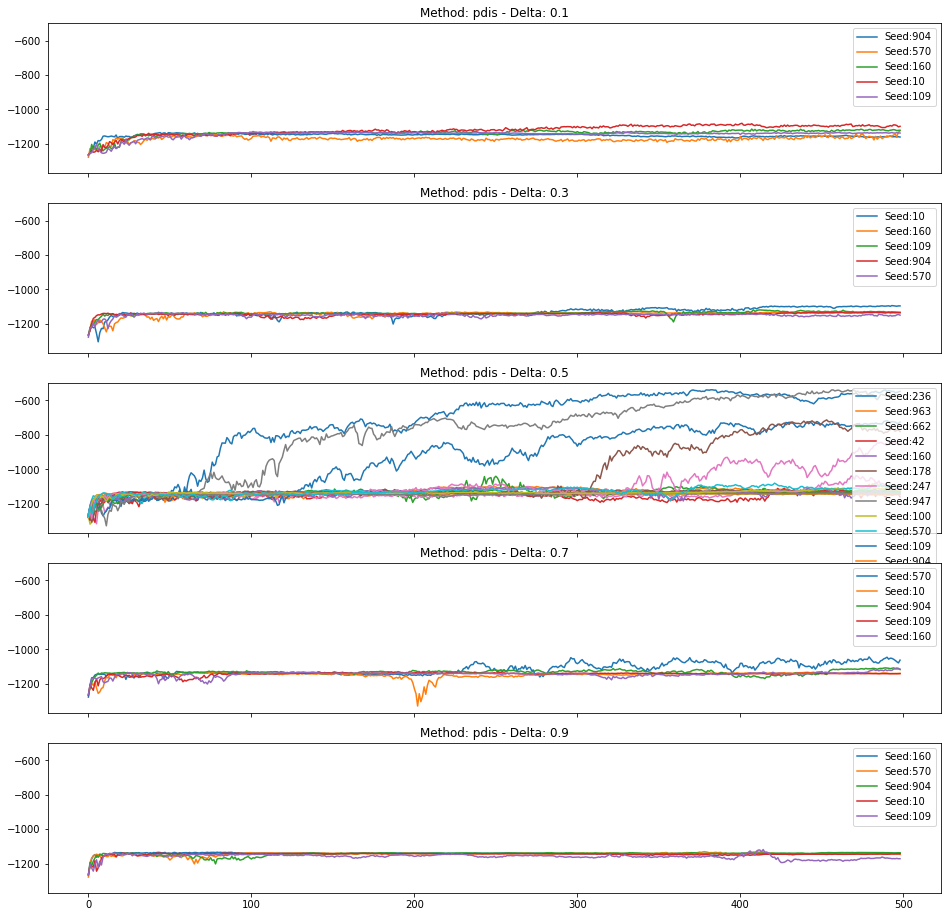

In [12]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                            ]):
    query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

At all deltas it seems that the performances is quite the same, but we choose 0.5 since it has that strange run which goes up, we want to inspect if it is just a chance or something is happening.

### Acrobot tuned

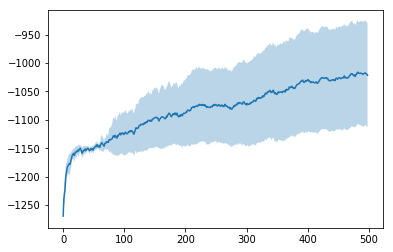

In [13]:
query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'pdis',
        'config.delta': 0.5,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

## Cartpole zero initialization

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 160, 570, 904, 109, 10
----------------------------------------
Method: pdis  - Delta: 0.2
Experiments: 5
Seeds: 570, 109, 904, 160, 10
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 20
Seeds: 689, 950, 570, 315, 746, 153, 247, 42, 662, 307, 10, 545, 963, 100, 947, 178, 109, 160, 904, 236
----------------------------------------
Method: pdis  - Delta: 0.4
Experiments: 5
Seeds: 160, 109, 10, 570, 904
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 109, 10, 570, 904, 160


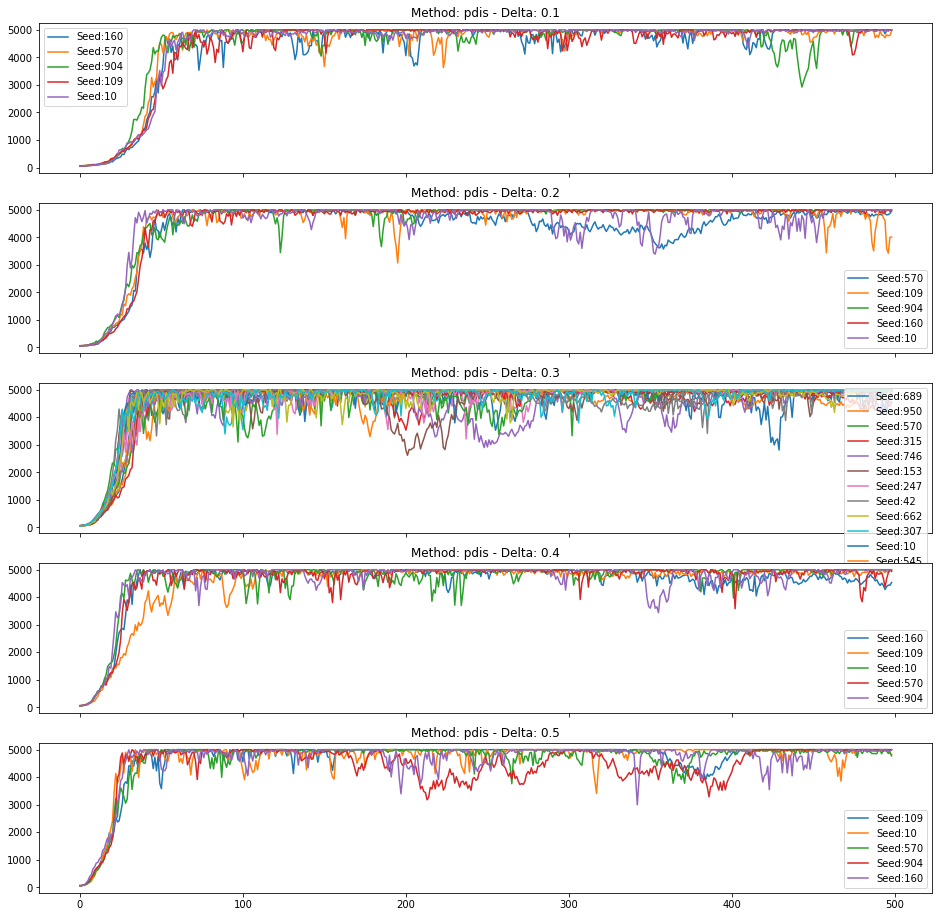

In [14]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.2),
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.4),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                            ]):
    query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

Choosing delta as 0.3

### Optimized runs

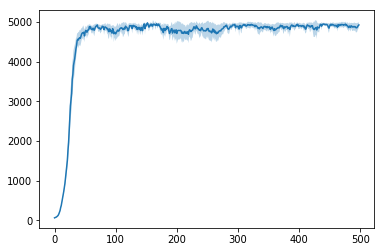

In [15]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'pdis',
        'config.delta': 0.3,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

## Mountain-car zero initialization

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 570, 904, 10, 109, 160
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 160, 109, 904, 10, 570
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 20
Seeds: 247, 100, 307, 662, 746, 947, 904, 963, 178, 570, 236, 545, 42, 10, 109, 315, 153, 950, 689, 160
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 160, 10, 570, 109, 904
----------------------------------------
Method: pdis  - Delta: 1.0
Experiments: 5
Seeds: 904, 109, 160, 10, 570


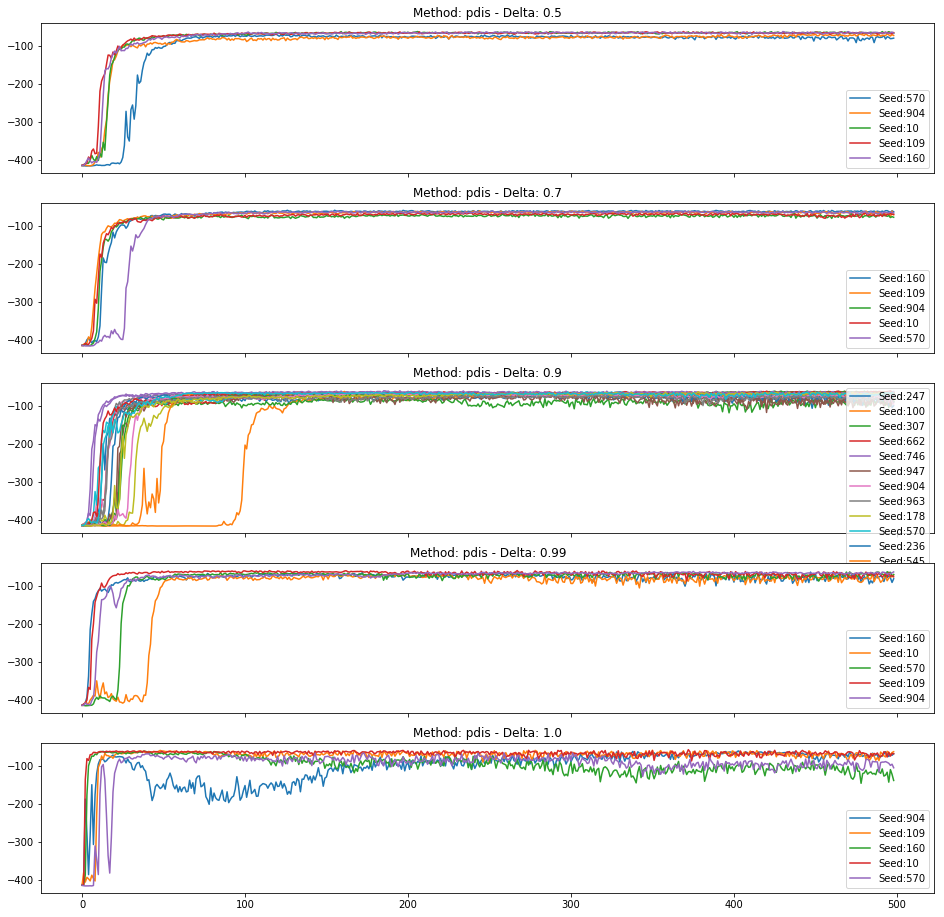

In [16]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.5), 
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                              ('pdis', 'pdis-max-d2', 1.0),
                                            ]):
    query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

Choosing delta as 0.9

### Optimized runs

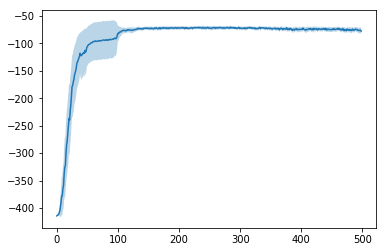

In [17]:
query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'pdis',
        'config.delta': 0.9,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

# Vanilla control-based POIS with zero initialization comparison

----------------------------------------
Method: is  - Delta: 0.1
Experiments: 5
Seeds: 570, 904, 109, 160, 10
----------------------------------------
Method: is  - Delta: 0.2
Experiments: 5
Seeds: 160, 904, 10, 109, 570
----------------------------------------
Method: is  - Delta: 0.3
Experiments: 5
Seeds: 160, 10, 570, 904, 109
----------------------------------------
Method: is  - Delta: 0.4
Experiments: 5
Seeds: 10, 570, 160, 904, 109
----------------------------------------
Method: is  - Delta: 0.5
Experiments: 5
Seeds: 904, 160, 10, 109, 570


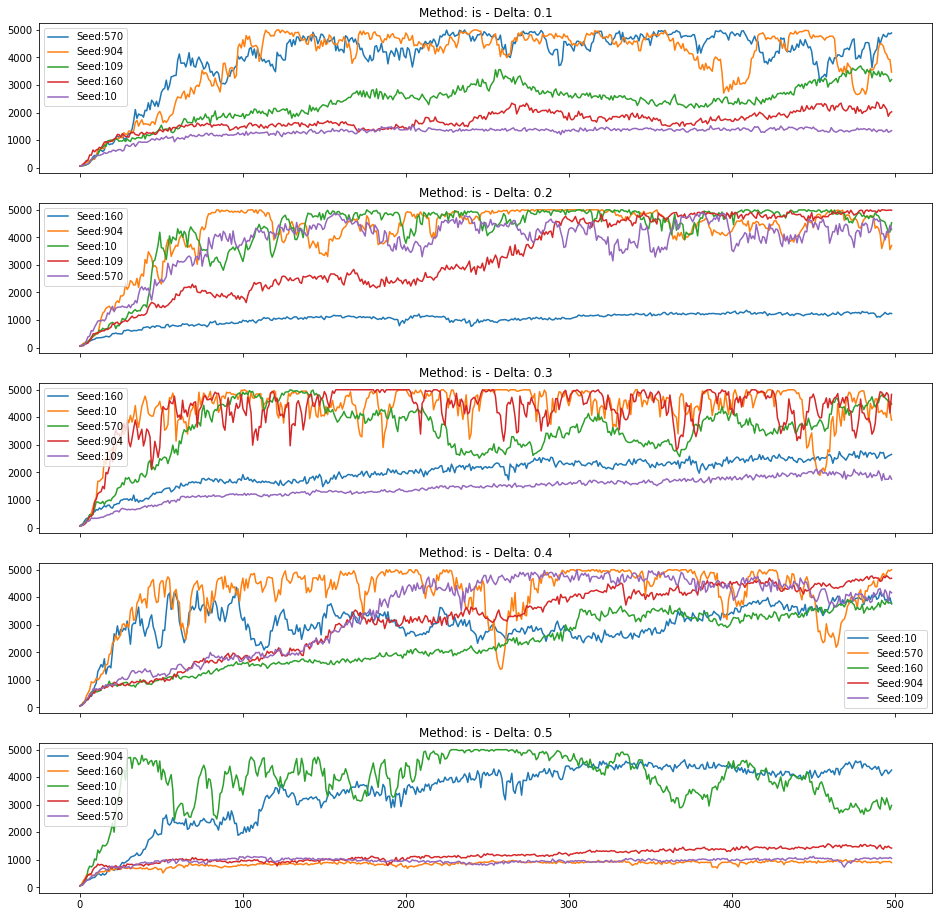

In [18]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('is', 'max-d2', 0.1), 
                                              ('is', 'max-d2', 0.2),
                                              ('is', 'max-d2', 0.3),
                                              ('is', 'max-d2', 0.4),
                                              ('is', 'max-d2', 0.5),
                                            ]):
    query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

Selecting again delta 0.4 as in the paper.

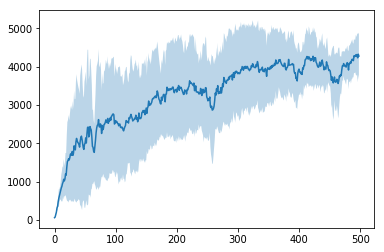

In [19]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'is',
        'config.delta': 0.4,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();